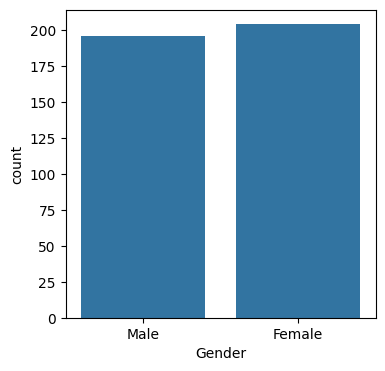

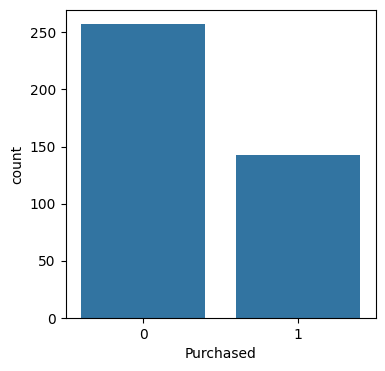

KNN Accuracy: 0.925
KNN Confusion Matrix:
[[48  4]
 [ 2 26]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80

The targeted audience is predicted not to purchase the product.


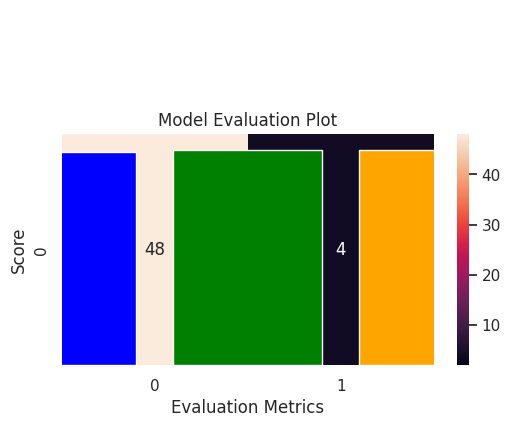

Cross-Validation Results:
Individual Accuracies: [0.675 0.8   0.775 0.9   0.8   0.75  0.925 0.85  0.75  0.8  ]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()
df.shape
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Gender'])
plt.show()
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Purchased'])
plt.show()
X = df.iloc[:, [1, 2, 3]].values  # Considering Gender, Age, and Estimated Salary as features
y = df.iloc[:, 4].values
label_encoder = LabelEncoder()
X[:, 0] = label_encoder.fit_transform(X[:, 0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
k_value = 5  # This value can be adjusted based on preference
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
print(f'KNN Accuracy: {accuracy}')
print(f'KNN Confusion Matrix:\n{conf_matrix}')
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
print(f'KNN Classification Report:\n{classification_report_str}')
new_data = np.array([[0, 30, 50000]])
predicted_purchase = knn_classifier.predict(scaler.transform(new_data))
if predicted_purchase[0] == 1:
    print("The targeted audience is predicted to purchase the product.")
else:
    print("The targeted audience is predicted not to purchase the product.")
accuracy = 0.925
precision = 0.93
recall = 0.93
f1_score = 0.93
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1_score]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0, 1])  # Set the y-axis limit between 0 and 1
plt.title('Model Evaluation Plot')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.show()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = make_scorer(accuracy_score)
cv_results = cross_val_score(knn_classifier, X, y, cv=cv, scoring=scoring)
print("Cross-Validation Results:")
print("Individual Accuracies:", cv_results)
